In [1]:
# !pip install ggplot

In [2]:
# !pip install seaborn

In [3]:
from pandas import read_csv, set_option, merge, DataFrame, isnull, notnull, NaT
import numpy as np
import tools
from itertools import repeat
from datetime import date
# import IPython
import seaborn as sns
# from ggplot import *

In [4]:
%matplotlib inline

In [5]:
# exibe todas as colunas do dataframe
set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# avaliacao

In [6]:
if 'df_avaliacao_db' in locals():
    del(df_avaliacao_db)

date_columns = ['DT_CALCULO', 'DT_REAJUSTE_BENEFICIO']
df_avaliacao_db = read_csv("input_csv/avaliacao.csv", sep=";", decimal=",", parse_dates=date_columns)

In [7]:
if 'df_avaliacao_tmp'in locals():
    del(df_avaliacao_tmp)
    
name_columns = {'ID_AVALIACAO': 'avaliacao', 'ID_CADASTRO': 'cadastro', 'IDPLANOPREV': 'plano_previdencia', 'ID_PLANO_BENEFICIO': 'plano_beneficio', 'DT_CALCULO': 'data_calculo',
                 'DT_REAJUSTE_BENEFICIO': 'data_reajuste_beneficio', 'VL_BENEFICIO_MINIMO': 'beneficio_minimo', 'PC_DESPESA_ADM_PARTICIPANTE': 'despesa_administ_partic',
                 'PC_DESPESA_ADM_PATROCINADORA': 'despesa_administ_patroc', 'PC_SAIDA_BPD': 'saida_bpd', 'PC_SAIDA_PORTABILIDADE': 'saida_portabilidade', 'PC_SAIDA_RESGATE': 'saida_resgate',
                 'VL_PECULIO_MINIMO_MORTE': 'peculio_minimo_morte', 'PC_PECULIO_MINIMO_MORTE': 'fator_peculio_morte_ativo', 'VL_PECULIO_MORTE_ASSISTIDO': 'fator_peculio_morte_assistido',
                 'NR_PAGTOS_BENEF_CONTRIB_ANO': 'numero_contribuicoes_ano', 'PC_FAIXA_01_CONTRIBUICAO': 'faixa_1_contribuicao', 'PC_FAIXA_02_CONTRIBUICAO': 'faixa_2_contribuicao',
                 'PC_FAIXA_03_CONTRIBUICAO': 'faixa_3_contribuicao', 'PC_META_CUSTEIO_ADMIN': 'taxa_carregamento_admin', 'PC_TAXA_ADMIN_BENEFICIO': 'taxa_admin_beneficio',
                 'PC_TAXA_REAL_CRESC_SALARIAL': 'taxa_cresc_salarial', 'PC_TAXA_REAL_CRESC_BENEFICIO': 'taxa_cresc_beneficio', 'PC_FATOR_VLR_REAL_SALARIO': 'fator_capacidade_salario',
                 'PC_FATOR_VLR_REAL_BEN_FUNCEF': 'fator_capacidade_funcef', 'PC_FATOR_VLR_REAL_BEN_INSS': 'fator_capacidade_inss', 'PC_FATOR_REAJ_BENEF_LIQUIDO': 'fator_capacidade_beneficio',
                 'PC_OPCAO_BUA': 'opcao_bua', 'PC_SAQUE_BUA': 'saque_bua'}
drop_columns = ['DS_PLANO_BENEFICIO', 'FL_CALCULAR_DEMONS_RESULTADO', 'FL_FLUXO_RECEITA_DESPESA_FOLHA', 'FL_MEMORIA_CALCULO', 'CD_COMPOSICAO_FAMILIAR']

df_avaliacao_tmp = df_avaliacao_db.rename(columns = name_columns).drop(drop_columns, axis=1)

In [8]:
df_avaliacao_tmp.despesa_administ_partic = df_avaliacao_tmp.despesa_administ_partic.map(tools.convertToPercent)
df_avaliacao_tmp.despesa_administ_patroc = df_avaliacao_tmp.despesa_administ_patroc.map(tools.convertToPercent)
df_avaliacao_tmp.saida_bpd = df_avaliacao_tmp.saida_bpd.map(tools.convertToPercent)
df_avaliacao_tmp.saida_portabilidade = df_avaliacao_tmp.saida_portabilidade.map(tools.convertToPercent)
df_avaliacao_tmp.saida_resgate = df_avaliacao_tmp.saida_resgate.map(tools.convertToPercent)
df_avaliacao_tmp.faixa_1_contribuicao = df_avaliacao_tmp.faixa_1_contribuicao.map(tools.convertToPercent)
df_avaliacao_tmp.faixa_2_contribuicao = df_avaliacao_tmp.faixa_2_contribuicao.map(tools.convertToPercent)
df_avaliacao_tmp.faixa_3_contribuicao = df_avaliacao_tmp.faixa_3_contribuicao.map(tools.convertToPercent)
df_avaliacao_tmp.taxa_carregamento_admin = df_avaliacao_tmp.taxa_carregamento_admin.map(tools.convertToPercent)
df_avaliacao_tmp.taxa_admin_beneficio = df_avaliacao_tmp.taxa_admin_beneficio.map(tools.convertToPercent)
df_avaliacao_tmp.taxa_cresc_salarial = df_avaliacao_tmp.taxa_cresc_salarial.map(tools.convertToPercent)
df_avaliacao_tmp.taxa_cresc_beneficio = df_avaliacao_tmp.taxa_cresc_beneficio.map(tools.convertToPercent)
df_avaliacao_tmp.fator_capacidade_salario = df_avaliacao_tmp.fator_capacidade_salario.map(tools.convertToPercent)
df_avaliacao_tmp.fator_capacidade_funcef = df_avaliacao_tmp.fator_capacidade_funcef.map(tools.convertToPercent)
df_avaliacao_tmp.fator_capacidade_inss = df_avaliacao_tmp.fator_capacidade_inss.map(tools.convertToPercent)
df_avaliacao_tmp.fator_capacidade_beneficio = df_avaliacao_tmp.fator_capacidade_beneficio.map(tools.convertToIndice)
df_avaliacao_tmp.opcao_bua = df_avaliacao_tmp.opcao_bua.map(tools.convertToPercent)
df_avaliacao_tmp.saque_bua = df_avaliacao_tmp.saque_bua.map(tools.convertToPercent)

# premissas do plano

In [9]:
# df_prem_plano_db = None
if 'df_prem_plano_db' in locals():
    del(df_prem_plano_db)
    
df_prem_plano_db = read_csv("input_csv/premissa_planos.csv", sep=";", decimal=",")

In [10]:
if 'df_prem_plano_tmp' in locals():
    del(df_prem_plano_tmp)
    
name_columns = {'ID_PLANO_BENEFICIO': 'plano_beneficio', 'IDADE_INICIO_CONTRIB_INSS_MAS': 'idade_inicio_contrib_inss_mas', 'IDADE_INICIO_CONTRIB_INSS_FEM': 'idade_inicio_contrib_inss_fem',
                'IDADE_APOSENT_FUNDACAO_MAS': 'idade_aposent_fundacao_mas', 'IDADE_APOSENT_FUNDACAO_FEM': 'idade_aposent_fundacao_fem', 'TEMPO_CONTRIB_INSS_MAS': 'tempo_contrib_inss_mas',
                'TEMPO_CONTRIB_INSS_FEM': 'tempo_contrib_inss_fem', 'MAIORIDADE_PLANO': 'maioridade_plano', 'PERCENTUAL_SRB': 'percentual_srb', 'TEMPO_CARENCIA_APOSENTADORIA': 'carencia_aposentadoria'}
drop_columns = ['ID_PREMISSA_PLANO']
# df_prem_plano = None
df_prem_plano_tmp = df_prem_plano_db.rename(columns = name_columns).drop(drop_columns, axis=1)
df_prem_plano_tmp.percentual_srb = df_prem_plano_tmp.percentual_srb.map(tools.convertToPercent)
# maioridade = df_prem_plano_db['MAIORIDADE_PLANO']

# premissas globais

In [11]:
#df_prem_global_db = None
if 'df_prem_global_db' in locals():
    del(df_prem_global_db)
    
date_columns = ['DT_ORIGEM_BNH', 'DT_LEI_9876_1999', 'DT_MEDIA_80_MAIORES_SALARIOS']
df_prem_global_db = read_csv("input_csv/premissa_global.csv", sep=";", decimal=",", parse_dates = date_columns)

In [12]:
if 'df_prem_global_tmp' in locals():
    del(df_prem_global_tmp)
    
name_columns = {'DT_ORIGEM_BNH': 'data_bnh', 'DT_LEI_9876_1999': 'data_lei_9876', 'DT_MEDIA_80_MAIORES_SALARIOS': 'data_media_maiores_salarios', 'TETO_CONTRIBUICAO_INSS': 'teto_contribuicao_inss',
                'TETO_BENEFICIO_INSS': 'teto_beneficio_inss', 'SALARIO_MINIMO': 'salario_minimo', 'COTA_FAMILIAR_PENSAO': 'cota_pensao_familiar',
                'PROB_APOSENTADO_CASADO_MAS': 'prob_aposentado_casado_mas', 'PROB_APOSENTADO_CASADO_FEM': 'prob_aposentado_casado_fem', 'LX_INICIAL': 'lx_inicial'}
drop_columns = ['ID_PREMISSA_GLOBAL']
#df_prem_global = None
df_prem_global_tmp = df_prem_global_db.rename(columns = name_columns).drop(drop_columns, axis=1)
df_prem_global_tmp.cota_pensao_familiar = df_prem_global_tmp.cota_pensao_familiar.map(tools.convertToPercent)
df_prem_global_tmp.prob_aposentado_casado_mas = df_prem_global_tmp.prob_aposentado_casado_mas.map(tools.convertToPercent)
df_prem_global_tmp.prob_aposentado_casado_fem = df_prem_global_tmp.prob_aposentado_casado_fem.map(tools.convertToPercent)
df_prem_global_tmp['avaliacao'] = df_avaliacao_tmp.avaliacao

In [13]:
df_prem_dif_idade = df_prem_global_tmp[['DIF_IDADE_CONJUGE_MAS', 'DIF_IDADE_CONJUGE_FEM']]
name_columns = {'DIF_IDADE_CONJUGE_FEM': 'F', 'DIF_IDADE_CONJUGE_MAS': 'M'}
df_prem_dif_idade = df_prem_dif_idade.rename(columns=name_columns)

In [14]:
df_dif_idade_depen_valido = df_prem_dif_idade.transpose()
# df_prem_dif_idade_transp.index = range(0,len(df_prem_dif_idade_transp))
# df_prem_dif_idade_transp.insert(0, 'Id', range(0, len(df_prem_dif_idade_transp)))
# df_prem_dif_idade_transp.set_index('Id')
df_dif_idade_depen_valido.reset_index(level=0, inplace=True)
df_dif_idade_depen_valido.columns = ['sexo_partic', 'diferenca_idade']
# df_dif_idade_depen_valido

In [15]:
# df_prem_dif_idade.index

# taxa de juros

In [16]:
# obtem as taxas de juros
if 'df_taxa_juros_db' in locals():
    del(df_taxa_juros_db)
    
df_taxa_juros_db = read_csv("input_csv/taxa_juros.csv", sep=";", decimal=",")

In [17]:
if 'df_taxa_juros' in locals():
    del(df_taxa_juros)
    
name_columns = {'NR_TEMPO_TAXA_JUROS': 'tempo', 'VL_TAXA_JUROS': 'taxa_juros'}
df_taxa_juros = df_taxa_juros_db.rename(columns= name_columns)
df_taxa_juros.taxa_juros = df_taxa_juros.taxa_juros.map(tools.convertToPercent)

# taxa de risco

In [18]:
# df_taxa_risco_db = None
if 'df_taxa_risco_db' in locals():
    del(df_taxa_risco_db)
    
df_taxa_risco_db = read_csv("input_csv/taxa_risco.csv", sep=";", decimal=",")

In [19]:
if 'df_taxa_risco' in locals():
    del(df_taxa_risco)
    
name_columns = {'NR_TEMPO_TAXA_RISCO': 'tempo', 'ID_RESPONSABILIDADE': 'responsabilidade', 'VL_TAXA_RISCO': 'taxa_risco'}
df_taxa_risco = df_taxa_risco_db.rename(columns = name_columns)
df_taxa_risco.taxa_risco = df_taxa_risco.taxa_risco.map(tools.convertToPercent)

# indice INPC - cotacao moeda

In [20]:
# df_indice_db = None
if 'df_indice_db' in locals():
    del(df_indice_db)
    
date_columns = ['COTDATA']
df_indice_db = read_csv("input_csv/cotacao.csv", sep=";", decimal=",", parse_dates = date_columns)

In [21]:
if 'df_indice' in locals():
    del(df_indice)
    
name_columns = {'COTDATA': 'data', 'COTVALOR': 'valor'}
# df_indice = None
df_indice = df_indice_db.rename(columns= name_columns)
df_indice.valor = df_indice.valor.map(tools.convertToIndice)

# indexador monetario

In [22]:
# df_indexador_db = None
if 'df_indexador_db' in locals():
    del(df_indexador_db)
    
df_indexador_db = read_csv("input_csv/indexador_monetario.csv", sep=";", decimal=",")

In [23]:
if 'df_indexador' in locals():
    del(df_indexador)
    
name_columns = {'ID_REFERENCIA_IDX_MON': 'indexador', 'PC_REAJUSTE': 'valor'}
drop_columns = ['DS_REFERENCIA_IDX_MON']
df_indexador = df_indexador_db.rename(columns=name_columns).drop(drop_columns, axis=1)

# reajuste salarial

In [24]:
# df_reaj_salarial_db = None
if 'df_reaj_salarial_db' in locals():
    del(df_reaj_salarial_db)
    
df_reaj_salarial_db = read_csv("input_csv/reajuste_salarial.csv", sep=";", decimal=",")

In [25]:
if 'df_reaj_salarial' in locals():
    del(df_reaj_salarial)
    
name_columns = {'CD_TIPO_REAJUSTE_SALARIAL': 'tipo', 'ID_PATROCINADORA': 'patrocinadora', 'PC_REAJUSTE': 'valor'}
drop_columns = ['DS_TIPO_REAJUSTE_SALARIAL']
df_reaj_salarial = df_reaj_salarial_db.rename(columns = name_columns).drop(drop_columns, axis= 1)
df_reaj_salarial.valor = df_reaj_salarial.valor.map(tools.convertToPercent)

# join : avaliacao + premissa plano + premissa global

In [26]:
if 'df_avaliacao' in locals():
    del(df_avaliacao)
    
df_avaliacao = merge(df_avaliacao_tmp, df_prem_plano_tmp, how='inner', on='plano_beneficio')

In [27]:
df_avaliacao = merge(df_avaliacao, df_prem_global_tmp, how='inner', on='avaliacao')

In [28]:
# df_avaliacao.dtypes

In [29]:
df_avaliacao

,avaliacao,cadastro,plano_previdencia,plano_beneficio,data_calculo,data_reajuste_beneficio,beneficio_minimo,despesa_administ_partic,despesa_administ_patroc,saida_bpd,saida_portabilidade,saida_resgate,peculio_minimo_morte,fator_peculio_morte_ativo,fator_peculio_morte_assistido,numero_contribuicoes_ano,faixa_1_contribuicao,faixa_2_contribuicao,faixa_3_contribuicao,taxa_carregamento_admin,taxa_admin_beneficio,taxa_cresc_salarial,taxa_cresc_beneficio,fator_capacidade_salario,fator_capacidade_funcef,fator_capacidade_inss,fator_capacidade_beneficio,opcao_bua,saque_bua,idade_inicio_contrib_inss_mas,idade_inicio_contrib_inss_fem,idade_aposent_fundacao_mas,idade_aposent_fundacao_fem,tempo_contrib_inss_mas,tempo_contrib_inss_fem,maioridade_plano,percentual_srb,carencia_aposentadoria,data_bnh,data_lei_9876,data_media_maiores_salarios,teto_contribuicao_inss,teto_beneficio_inss,salario_minimo,cota_pensao_familiar,prob_aposentado_casado_mas,prob_aposentado_casado_fem,DIF_IDADE_CONJUGE_MAS,DIF_IDADE_CONJUGE_FEM,lx_inicial
0,25445,10809,74,5,2016-12-31,2016-01-01,0.0,0.0398,0.0398,0.0,0.5,0.5,0.0,2.5,11.62,13,0.0,0.0,0.0,0.0398,0.009,0.0239,0.0,0.98,0.98,0.98,2.2177,0.0,0.0,18,18,53,48,35,30,24,0.2,10,1998-09-23,1999-11-29,1999-07-31,5189.82,5078.94,880.0,0.8,0.85,0.6,5,2,10000000


# participante

In [30]:
if 'df_partic_db' in locals():
    del(df_partic_db)

date_columns = ['DT_NASCIMENTO', 'DT_OPCAO_BPD', 'DT_ADMISSAO', 'DT_ASSOCIACAO_FUNDACAO']
data_type = {'NR_MATRICULA': str, 'matricula_titular': str}

df_partic_db = read_csv("input_csv/participante.csv", sep=";", decimal=",", encoding="latin1", parse_dates=date_columns, dtype = data_type, low_memory = False)

In [31]:
if 'df_partic_temp' in locals():
    del(df_partic_temp)
    
name_columns = {'ID_PARTICIPANTE': 'id_participante', 'ID_CADASTRO': 'cadastro', 'NR_MATRICULA': 'matricula', 'DT_NASCIMENTO': 'data_nascimento_partic', 'IR_SEXO': 'sexo_partic', 'ID_PATROCINADORA': 'patrocinadora',
                'CD_ESTADO_CIVIL': 'estado_civil', 'DT_ADMISSAO': 'data_admissao', 'DT_ASSOCIACAO_FUNDACAO': 'data_associacao', 'PC_BENEFICIO_ESPECIAL': 'pbe', 'FL_DEFICIENTE': 'deficiente',
                'NR_MATRICULA_TITULAR': 'matricula_titular', 'FL_MIGRADO': 'migrado'}
drop_columns = ['CD_SITUACAO_PATROC', 'DS_ESTADO_CIVIL', 'DT_OPCAO_BPD']
# df_partic2 = df_partic1.rename(columns= nomes_colunas).drop(['CD_SITUACAO_PATROC', 'DS_ESTADO_CIVIL', 'DT_OPCAO_BPD'], axis= 1)
df_partic_temp = df_partic_db.rename(columns= name_columns).drop(drop_columns, axis= 1)

In [32]:
df_partic_temp.deficiente = list(map(tools.convertToBoolean, df_partic_temp.deficiente))
df_partic_temp.migrado = df_partic_temp.migrado.map(tools.convertToBoolean)
df_partic_temp.pbe = df_partic_temp.pbe.map(tools.convertToPercent)

# plano de beneficios

In [33]:
if 'df_plano_db' in locals():
    del(df_plano_db)
    
date_columns = ['DT_ADESAO']
df_plano_db = read_csv("input_csv/plano_beneficio.csv", sep=";", decimal=",", parse_dates=date_columns)

In [34]:
if 'df_plano_tmp' in locals():
    del(df_plano_tmp)
    
name_columns = {'ID_PARTICIPANTE': 'id_participante', 'DT_ADESAO': 'data_adesao', 'VL_SLD_SUBCONTA_PARTICIPANTE': 'saldo_conta_partic', 'VL_SLD_SUBCONTA_PATROCINADORA': 'saldo_conta_patroc',
                'VL_RESERVA_BPD': 'reserva_bpd', 'VL_SALDO_PORTADO': 'saldo_portado', 'VL_BEN_SALDADO_INICIAL': 'beneficio_saldado', 'VL_SALARIO_PARTICIPACAO': 'salario_participacao',
                'PC_CONTRIBUICAO_PARTICIPANTE': 'contribuicao_partic', 'PC_CONTRIBUICAO_PATROCINADORA': 'contribuicao_patroc'}
df_plano_tmp = df_plano_db.rename(columns= name_columns)

In [35]:
df_plano_tmp.contribuicao_partic = df_plano_tmp.contribuicao_partic.map(tools.convertToPercent)
df_plano_tmp.contribuicao_patroc = df_plano_tmp.contribuicao_patroc.map(tools.convertToPercent)

# beneficio inss

In [36]:
if 'df_benef_inss_db' in locals():
    del(df_benef_inss_db)

date_columns = ['DT_INICIO_BENEFICIO']
df_benef_inss_db = read_csv("input_csv/beneficio_inss.csv", sep=";", decimal=",", parse_dates = date_columns)

In [37]:
if 'df_benef_inss_tmp' in locals():
    del(df_benef_inss_tmp)
    
name_columns = {'ID_PARTICIPANTE': 'id_participante', 'DT_INICIO_BENEFICIO': 'dib_inss', 'VL_VALOR': 'valor_beneficio_inss'}
df_benef_inss_tmp = df_benef_inss_db.rename(columns = name_columns)

# beneficio previdencia privada

In [38]:
if 'df_benef_prev_db' in locals():
    del(df_benef_prev_db)

date_columns = ['DT_INICIO_BENEFICIO']
df_benef_prev_db = read_csv("input_csv/beneficio_funcef.csv", sep=";", decimal=",", encoding="latin1", parse_dates= date_columns)

In [39]:
if 'df_benef_prev_tmp' in locals():
    del(df_benef_prev_tmp)
    
name_columns = {'ID_PARTICIPANTE': 'id_participante', 'IDBENEFICIO': 'beneficio', 'VL_VALOR': 'valor_beneficio_funcef', 'DT_INICIO_BENEFICIO': 'dib_funcef'}
drop_columns = ['NOME']
df_benef_prev_tmp = df_benef_prev_db.rename(columns= name_columns).drop(drop_columns, axis= 1)

In [40]:
df_benef_prev_tmp['tipo_beneficio'] = df_benef_prev_tmp.beneficio.map(tools.convertToTipoBeneficio)
df_benef_prev_tmp = df_benef_prev_tmp[df_benef_prev_tmp.tipo_beneficio != 0]
drop_columns = ['beneficio']
df_benef_prev_tmp = df_benef_prev_tmp.drop(drop_columns, axis = 1)

# dependentes

In [41]:
if 'df_depend_db' in locals():
    del(df_depend_db)
    
date_columns = ['DT_NASCIMENTO']
df_depend_db = read_csv("input_csv/dependente.csv", sep=";", decimal=",", encoding="latin1", parse_dates= date_columns)

In [42]:
if 'df_depend_tmp' in locals():
    del(df_depend_tmp)

# nomes_colunas = {'ID_PARTICIPANTE': 'id_participante', 'CD_GRAU_DEPENDENCIA': 'parentesco', 'DT_NASCIMENTO': 'data_nascimento', 'IR_SEXO': 'sexo', 'FL_INVALIDO': 'invalido'}
name_columns = {'ID_PARTICIPANTE': 'id_participante', 'CD_GRAU_DEPENDENCIA': 'parentesco', 'FL_INVALIDO': 'invalido'}
drop_columns = ['FL_DESIGNADO_RESGATE', 'FL_DEPENDENTE_LEGAL']
df_depend_tmp = df_depend_db.rename(columns= name_columns).drop(drop_columns, axis=1)

In [43]:
df_depend_tmp.invalido = df_depend_tmp.invalido.map(tools.convertToBoolean)

# dependente vitalicio valido (conjuge)

In [44]:
if 'df_depend_valido_tmp' in locals():
    del(df_depend_valido_tmp)
    
df_depend_valido_tmp = DataFrame.copy(df_depend_tmp[(df_depend_tmp.parentesco == 'COM') & (df_depend_tmp.invalido == False)])

name_columns = {'IR_SEXO': 'sexo_depend_valido', 'DT_NASCIMENTO': 'data_nascimento_depend_valido'}
drop_columns = ['parentesco', 'invalido']

df_depend_valido_tmp = df_depend_valido_tmp.rename(columns = name_columns).drop(drop_columns, axis = 1)

# dependente temporario (filho menor idade valido)

In [45]:
if 'df_depend_temporario_tmp' in locals():
    del(df_depend_temporario_tmp)
    
df_depend_temporario_tmp = DataFrame.copy(df_depend_tmp[(df_depend_tmp.parentesco == 'FIL') & (df_depend_tmp.invalido == False)])

name_columns = {'IR_SEXO': 'sexo_depend_temporario', 'DT_NASCIMENTO': 'data_nascimento_depend_temporario'}
drop_columns = ['parentesco', 'invalido']

df_depend_temporario_tmp = df_depend_temporario_tmp.rename(columns = name_columns).drop(drop_columns, axis = 1)

# dependente vitalicio invalido (conjuge invalido ou filho invalido)

In [46]:
if 'df_depend_invalido_tmp' in locals():
    del(df_depend_invalido_tmp)

df_depend_invalido_tmp = DataFrame.copy(df_depend_tmp[df_depend_tmp.invalido == True])

name_columns = {'IR_SEXO': 'sexo_depend_invalido', 'DT_NASCIMENTO': 'data_nascimento_depend_invalido'}
drop_columns = ['parentesco', 'invalido']

df_depend_invalido_tmp = df_depend_invalido_tmp.rename(columns = name_columns).drop(drop_columns, axis = 1)

# join: participante + plano + beneficio INSS + beneficio fundação

In [47]:
if 'df_participante' in locals():
    del(df_participante)
    
df_participante = merge(df_partic_temp, df_plano_tmp, how='inner', on='id_participante')
df_participante = merge(df_participante, df_benef_inss_tmp, how='left', on='id_participante')
df_participante = merge(df_participante, df_benef_prev_tmp, how='left', on='id_participante')

In [48]:
# df_participante.dtypes

# enquadramento participantes

In [49]:
# calcula idade dos participantes (ativos e assistidos[aposentados e pensionistas])
# df_participante['idade_partic'] = list(map(tools.calculateAge, df_participante.data_nascimento_partic, repeat(df_avaliacao.data_calculo[0], len(df_participante))))
df_participante['idade_partic'] = 0

for i, row in df_participante.iterrows():
    idade = -1
    
    idade = tools.calculateAge(row['data_nascimento_partic'], df_avaliacao.data_calculo[0])
    df_participante.set_value(i, 'idade_partic', idade)

In [50]:
# quantidade de participantes com idade nula
# len(df_participante[isnull(df_participante.idade_partic)][['idade_partic', 'sexo_partic']])

In [51]:
# df_participante.groupby('idade_partic').size()

In [52]:
df_participante.groupby('sexo_partic').size()

sexo_partic
F    41987
M    49523
dtype: int64

In [53]:
df_participante['data_calculo'] = list(repeat(df_avaliacao.data_calculo[0], len(df_participante)))

In [54]:
# adicina a diferenca de idade do conjuge de acordo com o sexo do participante
# df_participante = merge(df_participante, df_dif_idade_depen_valido, on='sexo_partic', how='inner')
df_participante['diferenca_idade'] = [df_avaliacao.DIF_IDADE_CONJUGE_FEM[0] if sexo == 'F' else df_avaliacao.DIF_IDADE_CONJUGE_MAS[0] for sexo in df_participante.sexo_partic]

In [55]:
# df_participante['casado'] = list(map(lambda estado_civil: False if estado_civil != 'C' else True, df_participante.estado_civil))
df_participante['casado'] = [True if estado_civil == 'C' else False for estado_civil in df_participante.estado_civil]

In [56]:
# df_participante.groupby('casado').size()

In [57]:
drop_columns = ['estado_civil']
df_participante = df_participante.drop(drop_columns, axis=1)

# ativos

In [58]:
# cria uma tabela com os participantes ativos
if 'df_ativos' in locals():
    del(df_ativos)

df_ativos = DataFrame.copy(df_participante[isnull(df_participante.dib_funcef)])

In [59]:
df_ativos.index = range(0, len(df_ativos))

In [60]:
df_ativos.groupby(['casado', 'sexo_partic']).size()

casado  sexo_partic
False   F              20469
        M              23143
True    F              18862
        M              24250
dtype: int64

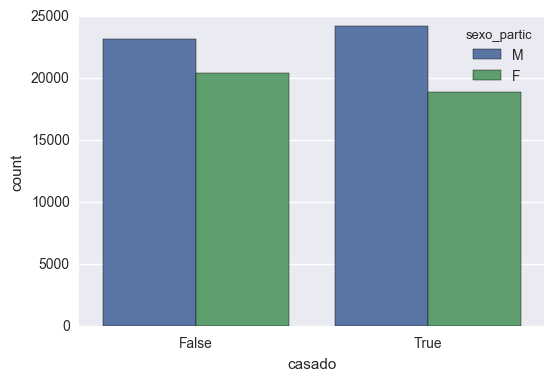

In [61]:
sns.countplot(x='casado', hue='sexo_partic', data=df_ativos)

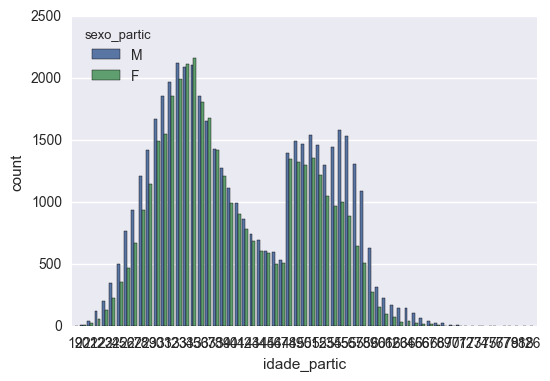

In [62]:
sns.countplot(x = 'idade_partic', hue='sexo_partic', data = df_ativos)

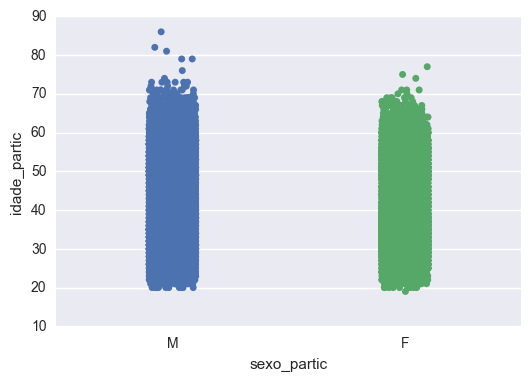

In [63]:
sns.stripplot(x = 'sexo_partic', y = 'idade_partic', data = df_ativos, jitter= True)

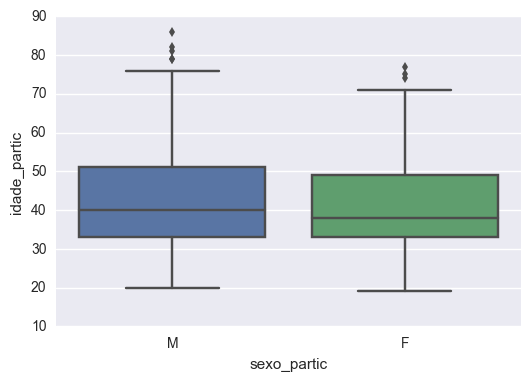

In [64]:
sns.boxplot(x = 'sexo_partic', y = 'idade_partic', data = df_ativos)

In [65]:
# une os dados do dependente vitalicio valido
df_ativos = merge(df_ativos, df_depend_valido_tmp, how='left', on='id_participante')

In [134]:
# calcula idade do dependente valido (conjuge) e adiciona o sexo caso nao tenha
df_ativos['idade_depend_valido'] = 0

for i, row in df_ativos.iterrows():
    idade = -1
    
    idade = tools.calculateAgeDif(row['sexo_partic'], row['idade_partic'], row['diferenca_idade'])
    
    if isnull(row['sexo_depend_valido']):
        if row['sexo_partic'] == 'F':
            sexo = 'M'
        else:
            sexo = 'F'
            
        df_ativos.set_value(i, 'sexo_depend_valido', sexo)
        
    df_ativos.set_value(i, 'idade_depend_valido', idade)

In [135]:
# calcula idade do dependente valido (conjuge) e adiciona o sexo caso nao tenha
df_ativos['idade_depend_valido_2'] = [(i + d) if s == 'F' else (i - d) for s, i, d in zip(df_ativos.sexo_partic, df_ativos.idade_partic, df_ativos.diferenca_idade)]

In [136]:
df_ativos[['idade_depend_valido', 'idade_depend_valido_2']]

,idade_depend_valido,idade_depend_valido_2
0,53,53
1,57,57
2,52,52
3,53,53
4,52,52
5,58,58
6,52,52
7,53,53
8,58,58
9,51,51


In [69]:
df_ativos['idade_aposentadoria_fundacao'] = [df_avaliacao.idade_aposent_fundacao_fem[0] if sexo == 'F' else df_avaliacao.idade_aposent_fundacao_mas[0] for sexo in df_ativos.sexo_partic]

In [70]:
df_ativos['idade_inicio_contrib_inss'] = [df_avaliacao.idade_inicio_contrib_inss_fem[0] if sexo == 'F' else df_avaliacao.idade_inicio_contrib_inss_mas[0] for sexo in df_ativos.sexo_partic]

In [71]:
df_ativos['tempo_contrib_inss'] = [df_avaliacao.tempo_contrib_inss_fem[0] if sexo == 'F' else df_avaliacao.tempo_contrib_inss_mas[0] for sexo in df_ativos.sexo_partic]

In [72]:
df_ativos['probab_casado'] = [df_avaliacao.prob_aposentado_casado_fem[0] if sexo == 'F' else df_avaliacao.prob_aposentado_casado_mas[0] for sexo in df_ativos.sexo_partic]

In [73]:
df_ativos['idade_admissao'] = list(map(tools.calculateAge, df_ativos.data_nascimento_partic, df_ativos.data_admissao))

In [74]:
df_ativos['idade_inicio_contrib_inss'] = [min(a, b) for a, b in zip(df_ativos.idade_inicio_contrib_inss, df_ativos.idade_admissao)]

In [75]:
def calculateDate(data, anos):
    try:
        return data.replace(year = int(data.year + anos))
    except ValueError:
        return data.replace(year = int(data.year + anos), day=28)

In [76]:
df_ativos['data_inicio_contrib_inss'] = [calculateDate(d, a) for d, a in zip(df_ativos.data_nascimento_partic, df_ativos.idade_inicio_contrib_inss)]

In [77]:
df_ativos['tempo_aposentadoria_inss'] = [a + b for a, b in zip(df_ativos.idade_inicio_contrib_inss, df_ativos.tempo_contrib_inss)]

In [78]:
df_ativos['data_aposentadoria_inss'] = [i if notnull(i) else calculateDate(d, a) for i, d, a in zip(df_ativos.dib_inss, df_ativos.data_nascimento_partic, df_ativos.tempo_aposentadoria_inss)]

In [79]:
df_ativos['data_aposentadoria_inss'] = [max(a, c) for a, c in zip(df_ativos.data_aposentadoria_inss, df_ativos.data_calculo)]

In [80]:
df_ativos[['sexo_partic', 'idade_aposentadoria_fundacao', 'idade_inicio_contrib_inss', 'tempo_contrib_inss', 'diferenca_idade', 'probab_casado', 'idade_admissao', 'data_inicio_contrib_inss', 'tempo_aposentadoria_inss', 'data_calculo', 'data_aposentadoria_inss']]

,sexo_partic,idade_aposentadoria_fundacao,idade_inicio_contrib_inss,tempo_contrib_inss,diferenca_idade,probab_casado,idade_admissao,data_inicio_contrib_inss,tempo_aposentadoria_inss,data_calculo,data_aposentadoria_inss
0,M,53,18,35,5,0.85,24,1976-04-09,53,2016-12-31,2016-12-31
1,F,48,18,30,2,0.60,22,1979-04-02,48,2016-12-31,2016-12-31
2,M,53,18,35,5,0.85,23,1977-12-17,53,2016-12-31,2016-12-31
3,M,53,18,35,5,0.85,25,1976-02-09,53,2016-12-31,2016-12-31
4,M,53,18,35,5,0.85,23,1977-04-11,53,2016-12-31,2016-12-31
5,F,48,18,30,2,0.60,23,1978-05-31,48,2016-12-31,2016-12-31
6,M,53,18,35,5,0.85,23,1977-07-21,53,2016-12-31,2016-12-31
7,M,53,18,35,5,0.85,25,1976-01-24,53,2016-12-31,2016-12-31
8,F,48,18,30,2,0.60,22,1978-09-24,48,2016-12-31,2016-12-31
9,M,53,18,35,5,0.85,22,1978-09-20,53,2016-12-31,2016-12-31


In [81]:
# df_ativos['idade_depend_valido'] = list(map(tools.calculateAgeDif, df_ativos.sexo_partic, df_ativos.idade_partic, df_ativos.diferenca_idade))

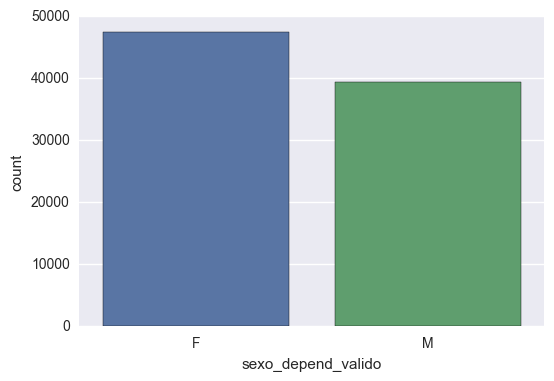

In [82]:
sns.countplot(x = 'sexo_depend_valido', data = df_ativos)

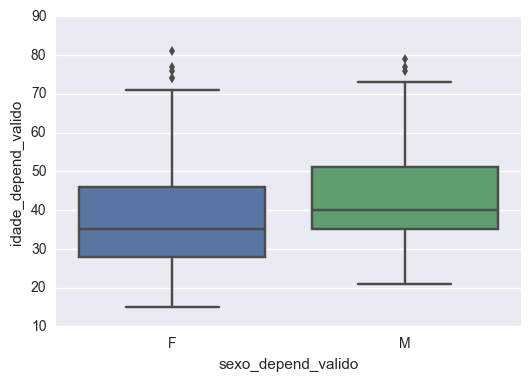

In [83]:
sns.boxplot(x = 'sexo_depend_valido', y = 'idade_depend_valido', data = df_ativos)

In [84]:
# df_ativos[['sexo_partic', 'idade_partic', 'diferenca_idade', 'sexo_depend_valido', 'idade_depend_valido']]

In [85]:
# campo pra informar se o participante é assistido = 1 e ativos = 0
# df_participante['assistido'] = list(map(lambda d: True if not pd.isnull(d) else False, df_participante.dib_funcef))

In [86]:
# apaga as colunas nao utilizadas nos calculos
# drop_columns = ['data_nascimento_partic', 'estado_civil', 'matricula_titular', 'migrado', 'CD_SITUACAO_FUNDACAO', 'data_nascimento_depend_valido', 'diferenca_idade', 'casado', 'deficiente']
# df_ativos = df_ativos.drop(drop_columns, axis=1)

In [87]:
# df_ativos.head()

In [88]:
# df = df_ativos.apply(tools.func1, axis=1)

# assistidos (aposentados + pensionistas)

In [89]:
# cria uma tabela com os participantes assistidos (aposentados e pensionistas)
if 'df_assistidos' in locals():
    del(df_assistidos)
    
df_assistidos = DataFrame.copy(df_participante[notnull(df_participante.dib_funcef)])

In [90]:
df_assistidos.index = range(0, len(df_assistidos))

In [91]:
# df_assistidos.index

In [92]:
# define o tipo de assistido[aposentado = 1 ou pensionista = 2]
df_assistidos['tipo_assistido'] = list(map(tools.getTipoAssistido, df_assistidos.matricula_titular))

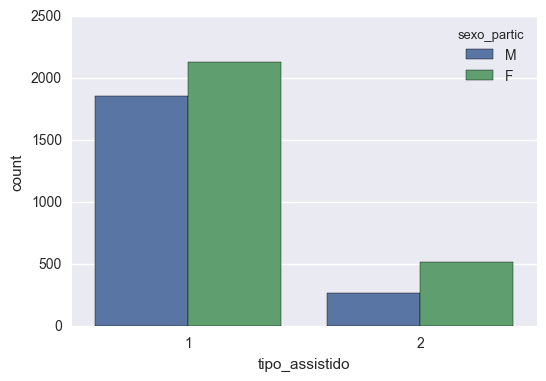

In [93]:
sns.countplot(x = 'tipo_assistido', hue= 'sexo_partic', data= df_assistidos)

# calcula idade dependente valido (conjuge)

In [94]:
# df_depend_valido_idade_p1 = pd.merge(df_assistidos[['id_participante']][df_assistidos.tipo_assistido == 1], df_depend_valido_tmp[['id_participante', 'data_nascimento_depend_valido']], on='id_participante', how='inner')

In [95]:
# df_depend_valido_idade_p2 = pd.merge(df_assistidos[['id_participante']][(df_assistidos.tipo_assistido == 1) & (df_assistidos.casado)], df_depend_valido_tmp[['id_participante', 'data_nascimento_depend_valido']], on='id_participante', how='left')
# df_assistidos[(df_assistidos.casado) & (pd.isnull(df_assistidos.data_nascimento_depend_valido))]

# import pandasql as ps
# pysql = lambda q: ps.sqldf(q, globals())

# query = "select t1.id_participante, t1.casado, t1.data_nascimento_partic \
#          from df_assistidos t1 \
#          where not exists (select * from df_depend_valido_tmp t2 where t2.id_participante = t1.id_participante) \
#          and casado = 1"
# df = pysql(query)

In [96]:
# teste de calculo da idade dos dependentes validos vitalicios - nao funcional
# df['idade'] = 0
# for row in df.itertuples(index=True, name='Pandas'):
#     idade = 0
#     tipo_assistido = getattr(row, 'tipo_assistido')
    
#     if tipo_assistido == 1:
#         idade = 10
        
#     setattr(row, 'idade', idade)

In [97]:
df_assistidos = merge(df_assistidos, df_depend_valido_tmp, on= 'id_participante', how= 'left')

In [98]:
# este codigo esta funcionando para calcular a idade dos dependentes validos vitalicios
# cria a coluna idade dependente valido e inicializa com 0
df_assistidos['idade_depend_valido'] = 0

for i, row in df_assistidos.iterrows():
    idade = -1
    
    if row['tipo_assistido'] == 1:
        if notnull(row['data_nascimento_depend_valido']):
            idade = tools.calculateAge(row['data_nascimento_depend_valido'], df_avaliacao.data_calculo[0])
        elif isnull(row['data_nascimento_depend_valido']) and row['casado']:
            idade = tools.calculateAgeDif(row['sexo_partic'], row['idade_partic'], row['diferenca_idade'])
            
            if row['sexo_partic'] == 'F':
                sexo = 'M'
            else:
                sexo = 'F'
                
            df_assistidos.set_value(i, 'sexo_depend_valido', sexo)
        
    df_assistidos.set_value(i, 'idade_depend_valido', idade)

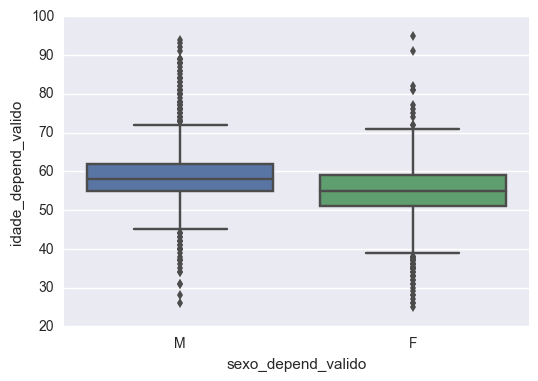

In [99]:
sns.boxplot(x = 'sexo_depend_valido', y = 'idade_depend_valido', data = df_assistidos[df_assistidos.tipo_assistido == 1])

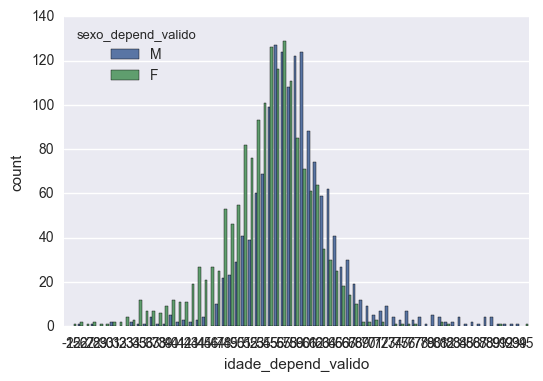

In [100]:
sns.countplot(x = 'idade_depend_valido', hue='sexo_depend_valido', data = df_assistidos[df_assistidos.tipo_assistido == 1])

In [101]:
df_assistidos.groupby('sexo_depend_valido').size()

sexo_depend_valido
F    1632
M    1528
dtype: int64

In [102]:
# df_assistidos[['data_nascimento_depend_valido', 'idade_depend_valido']]

In [103]:
# df_assistidos[['data_nascimento_partic', 'sexo_partic', 'casado', 'diferenca_idade', 'data_nascimento_depend_valido', 'tipo_assistido']]

In [104]:
# for index, row in df_assistidos.iterrows():
#     if row.tipo_assistido == 1:
#         if pd.notnull(row.data_nascimento_depend_valido):
#             row[idade_depend_valido] = tools.calculateAge(row.data_nascimento_depend_valido, df_avaliacao.data_calculo)
#         else:
#             row[idade_depend_valido] = 0

# calcula idade dependente temporario (filho válido)

In [105]:
# adiciona os dependentes vitalicio temporario
if len(df_assistidos) > 0:
    df_assistidos = merge(df_assistidos, df_depend_temporario_tmp, how='left', on='id_participante')
#     df_assistidos = pd.merge(df_assistidos, df_depend_invalido_tmp, how='left', on='id_participante')

In [106]:
# apaga data nascimento e sexo dependentes temporarios que são pensionistas (tipo assistido = 2)
# for i, row in df_assistidos.iterrows():
#     if row['tipo_assistido'] == 2:
#         df_assistidos.set_value(i, 'sexo_depend_temporario', np.NaN)
#         df_assistidos.set_value(i, 'data_nascimento_depend_temporario', NaT)

In [107]:
# calcula idade dos dependente vitalicio temporario dos aposentados (tipo assistido = 1)
# apaga data nascimento e sexo dependentes temporarios que são pensionistas (tipo assistido = 2)

df_assistidos['idade_depend_temporario'] = 0

for i, row in df_assistidos.iterrows():
    if row['tipo_assistido'] == 1:
        if notnull(row['data_nascimento_depend_temporario']):
            idade = tools.calculateAge(row['data_nascimento_depend_temporario'], df_avaliacao.data_calculo[0])
        
            if idade <= df_avaliacao.maioridade_plano[0]:
                df_assistidos.set_value(i, 'idade_depend_temporario', idade)
            else:
                df_assistidos.set_value(i, 'sexo_depend_temporario', np.NaN)
                df_assistidos.set_value(i, 'data_nascimento_depend_temporario', NaT)
    else:
        df_assistidos.set_value(i, 'sexo_depend_temporario', np.NaN)
        df_assistidos.set_value(i, 'data_nascimento_depend_temporario', NaT)

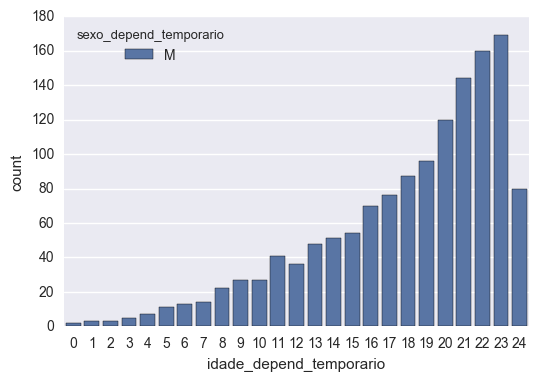

In [108]:
if len(df_assistidos[(df_assistidos.tipo_assistido == 1) & (notnull(df_assistidos.data_nascimento_depend_temporario))]) > 0:
    sns.countplot(x = 'idade_depend_temporario', hue='sexo_depend_temporario', data = df_assistidos[df_assistidos.tipo_assistido == 1])

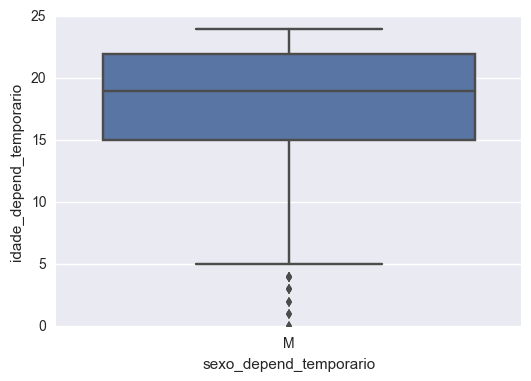

In [109]:
if len(df_assistidos[(df_assistidos.tipo_assistido == 1) & (notnull(df_assistidos.data_nascimento_depend_temporario))]) > 0:
    sns.boxplot(x = 'sexo_depend_temporario', y = 'idade_depend_temporario', data = df_assistidos[df_assistidos.tipo_assistido == 1])

# calcula idade dependente invalido (conjuge ou filho inválido)

In [110]:
# adiciona os dependentes vitalicio invalido
if len(df_assistidos) > 0:
#     df_assistidos = pd.merge(df_assistidos, df_depend_temporario_tmp, how='left', on='id_participante')
    df_assistidos = merge(df_assistidos, df_depend_invalido_tmp, how='left', on='id_participante')

In [111]:
# calcula idade dos dependente vitalicio invalido dos aposentados (tipo assistido = 1)
# apaga data nascimento e sexo dependentes temporarios que são pensionistas (tipo assistido = 2)

df_assistidos['idade_depend_invalido'] = 0

for i, row in df_assistidos.iterrows():
    if row['tipo_assistido'] == 1:
        if notnull(row['data_nascimento_depend_invalido']):
            idade = tools.calculateAge(row['data_nascimento_depend_invalido'], df_avaliacao.data_calculo[0])
            df_assistidos.set_value(i, 'idade_depend_temporario', idade)
    else:
        df_assistidos.set_value(i, 'sexo_depend_invalido', np.NaN)
        df_assistidos.set_value(i, 'data_nascimento_depend_invalido', NaT)

In [112]:
# df_assistidos[['data_nascimento_depend_invalido', 'sexo_depend_invalido', 'idade_depend_invalido']]

In [113]:
if len(df_assistidos[(df_assistidos.tipo_assistido == 1) & (notnull(df_assistidos.data_nascimento_depend_invalido))]) > 0:
    sns.countplot(x = 'idade_depend_invalido', hue='sexo_depend_invalido', data = df_assistidos[df_assistidos.tipo_assistido == 1])

In [114]:
if len(df_assistidos[(df_assistidos.tipo_assistido == 1) & (notnull(df_assistidos.data_nascimento_depend_invalido))]) > 0:
    sns.boxplot(x = 'sexo_depend_invalido', y = 'idade_depend_invalido', data = df_assistidos[df_assistidos.tipo_assistido == 1])

In [115]:
# calcula idade dependente vitalicio invalido
# df_assistidos['idade_depend_invalido'] = list(map(tools.calculateAge, df_assistidos.data_nascimento_depend_invalido, repeat(df_avaliacao.data_calculo[0], len(df_assistidos))))

In [116]:
# df_assistidos.idade_depend_temporario[pd.notnull(df_assistidos.idade_depend_temporario)]

In [117]:
# df_assistidos.idade_depend_temporario[df_assistidos.idade_depend_temporario > 21]

In [118]:
# df_assistidos[['data_nascimento_depend_temporario', 'sexo_depend_temporario', 'idade_depend_temporario']]

In [119]:
df_assistidos['idade_depend_invalido'] = list(map(tools.calculateAge, df_assistidos.data_nascimento_depend_invalido, repeat(df_avaliacao.data_calculo, len(df_assistidos))))

In [120]:
# df_assistidos[['data_nascimento_depend_invalido', 'sexo_depend_invalido', 'idade_depend_invalido']]

In [121]:
# apaga as colunas que não são utilizadas nos calculos
drop_columns = ['data_nascimento_depend_invalido', 'data_nascimento_depend_temporario', 'data_nascimento_depend_valido', 'data_nascimento_partic', 'casado', 'diferenca_idade']
df_assistidos = df_assistidos.drop(drop_columns, axis = 1)

In [122]:
df_assistidos.head()

,id_participante,cadastro,matricula,sexo_partic,patrocinadora,data_admissao,data_associacao,pbe,deficiente,matricula_titular,migrado,data_adesao,saldo_conta_partic,saldo_conta_patroc,reserva_bpd,saldo_portado,beneficio_saldado,salario_participacao,CD_SITUACAO_FUNDACAO,contribuicao_partic,contribuicao_patroc,dib_inss,valor_beneficio_inss,valor_beneficio_funcef,dib_funcef,tipo_beneficio,idade_partic,data_calculo,tipo_assistido,sexo_depend_valido,idade_depend_valido,sexo_depend_temporario,idade_depend_temporario,sexo_depend_invalido,idade_depend_invalido
0,10123420,10809,0000247,M,91008,1983-02-28,1983-02-28,0.0,False,NaN,True,2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,2010-01-11,3182.15,707.70,2013-01-03,1.0,59,2016-12-31,1,NaN,-1,M,8,NaN,0
1,10123421,10809,0000419,F,91008,1983-02-21,1983-02-21,0.0,False,NaN,True,2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,2013-02-21,2875.15,834.72,2016-04-25,1.0,55,2016-12-31,1,M,57,NaN,0,NaN,0
2,10123422,10809,0000595,M,91008,1983-02-21,1983-02-21,0.0,False,NaN,True,2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,2011-04-24,2903.90,440.59,2012-07-28,1.0,58,2016-12-31,1,F,55,NaN,0,NaN,0
3,10123423,10809,0000885,F,91008,1983-10-02,1983-10-02,0.0,False,NaN,True,2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,2012-03-01,4190.99,146.30,2012-03-01,1.0,58,2016-12-31,1,NaN,-1,NaN,0,NaN,0
4,10123424,10809,0000968,F,91008,1983-02-21,1983-02-21,0.0,False,NaN,True,2006-01-09,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,2009-01-03,2755.83,394.41,2010-04-27,1.0,56,2016-12-31,1,M,49,M,17,NaN,0


In [123]:
# df_assistidos.tail()

In [124]:
# slice dataframe por colunas
# df_avaliacao[['dif_idade_conjuge_mas', 'dif_idade_conjuge_fem']]

In [125]:
# df_participante.valor_beneficio_inss = df_participante.valor_beneficio_inss.map(tools.changeNullToZero)

In [126]:
# df_participante.valor_beneficio_inss = list(map(lambda x: x if not pd.isnull(x) else 0.00, df_participante.valor_beneficio_inss))

In [127]:
# df_participante.valor_beneficio_funcef = list(map(lambda x: x if not pd.isnull(x) else 0.00, df_participante.valor_beneficio_funcef))

In [128]:
# df_participante['idade_partic'] = list(map(tools.calculateAge, df_participante.data_nascimento_partic, itertools.repeat(df_avaliacao.data_calculo, len(df_participante))))

In [129]:
#del(df_participante['idade_depend_valido'])
# df_participante['idade_depend_valido'] = list(map(tools.calculateAge, df_participante.data_nascimento_depend_valido, itertools.repeat(df_avaliacao.data_calculo, len(df_participante))))

In [130]:
# df_participante['idade_depend_valido']

In [131]:
#if len(df_depend_valido) > 0:
    #df_participantes['idade_depend_valido'] = list(map(tools.calculateAge, df_depend_valido.data_nascimento, itertools.repeat(df_avaliacao.data_calculo, len(df_depend_valido))))
    #df_depend_valido.head(10)
#else:
    #del(df_depend_valido)
    
#df_depend_valido = df_depend_valido.drop(['data_nascimento'], axis = 1)

In [132]:
#if len(df_depend_invalido) > 0:
    #df_participantes['idade_invalido'] = list(map(tools.calculateAge, df_depend_invalido.data_nascimento_valido, itertools.repeat(df_avaliacao.data_calculo, len(df_depend_invalido))))
    #df_depend_invalido.head(10)
#else:
#    del(df_depend_invalido)

#df_depend_invalido = df_depend_invalido.drop(['data_nascimento'], axis = 1)

In [133]:
#if len(df_depend_temporario) > 0:
    #df_depend_temporario['idade_temporario'] = list(map(tools.calculateAge, df_depend_temporario.data_nascimento, itertools.repeat(df_avaliacao.data_calculo, len(df_depend_temporario))))
    #df_depend_temporario.head(10)
#else:
#    del(df_depend_temporario)

#df_depend_temporario = df_depend_temporario.drop(['data_nascimento'], axis = 1)